In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from io import StringIO
import pydotplus
from IPython.display import Image
from sklearn import metrics

In [ ]:
print('Upload Dataset path:')
path=input()
df=pd.read_csv(path)


Upload Dataset path:
/content/sample_data/Iris.csv


In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X=df.iloc[:, 1:-1]
y=df.iloc[:, -1]

In [ ]:
columns=X.columns

In [ ]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
unique_species = df['Species'].unique()

# Display the unique species and their corresponding label numbers
for i, species in enumerate(unique_species):
    print(f"Species: {species}, Label Number: {i}")

Species: Iris-setosa, Label Number: 0
Species: Iris-versicolor, Label Number: 1
Species: Iris-virginica, Label Number: 2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


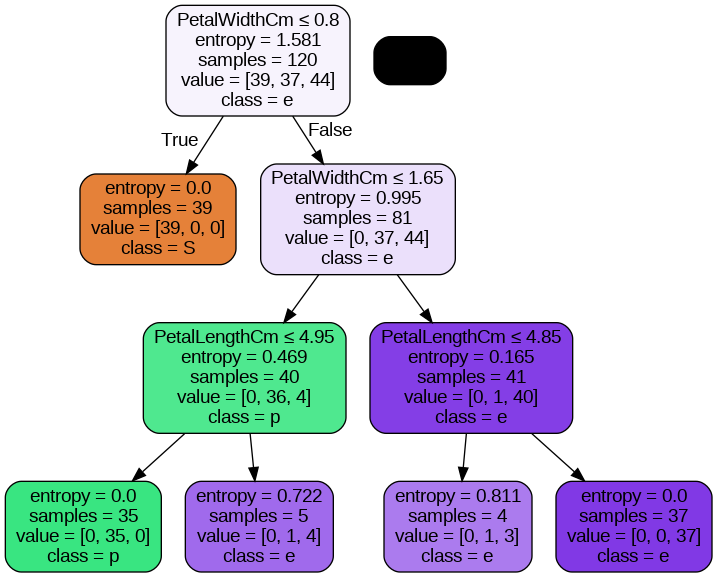

In [ ]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = columns,class_names='Species', impurity=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [ ]:
def predict_class(model, sample):
    predicted_class = model.predict([sample])[0]
    return predicted_class
new_data_point = [5.1, 3.5, 1.4,	0.2]  # Example new data point
predicted_class = predict_class(model, new_data_point)
print("Predicted class label:", predicted_class)

Predicted class label: Iris-setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
